# Machine Learning Laboratory - Assignment III
### Dataset Description:
The dataset used in this exercise is the Breast Cancer dataset, which contains
features related to cell nuclei measurements from breast cancer cases. The goal
is to classify the samples into malignant or benign categories using a Decision
Tree Classifier implemented from scratch, without using built-in functions.
### Questions:
1. Write Python code to perform an exploratory data analysis (EDA) on the
dataset, which includes visualizing the distribution of key features.
2. Implement a Decision Tree Classifier from scratch using the Gini index as
the criterion for splitting the dataset at each node.
3. Describe the recursive process for splitting the dataset into nodes based
on the Gini index. Include conditions for stopping the recursion, such as
the maximum depth of the tree or minimum number of samples per node.
4. Evaluate the performance of your Decision Tree Classifier on a test set.
Report performance metrics such as accuracy, precision, recall, and the
confusion matrix.
5. Visualize the confusion matrix and ROC curve.

## 1. Exploratory Data Analysis (EDA) on the Breast Cancer Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

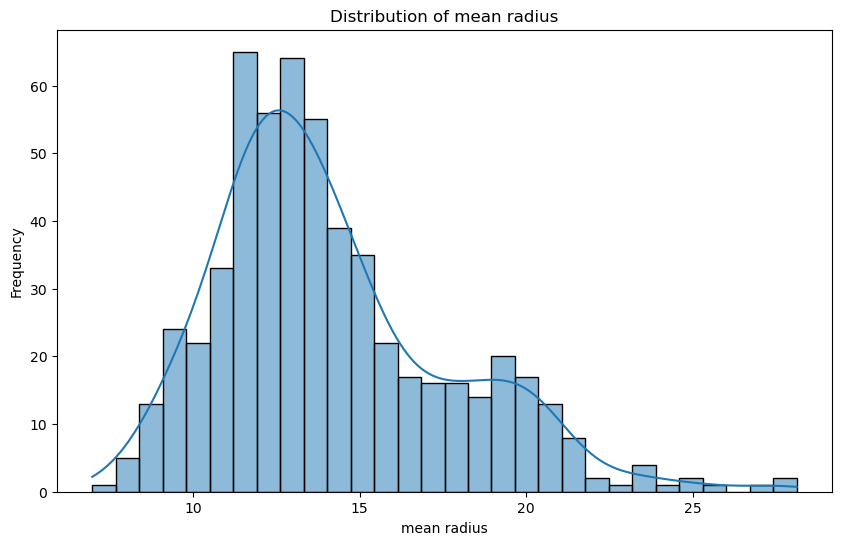

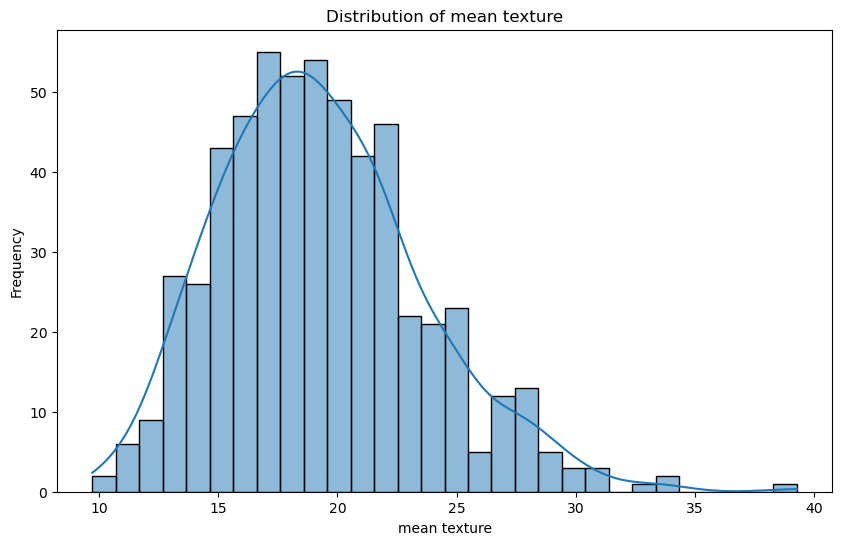

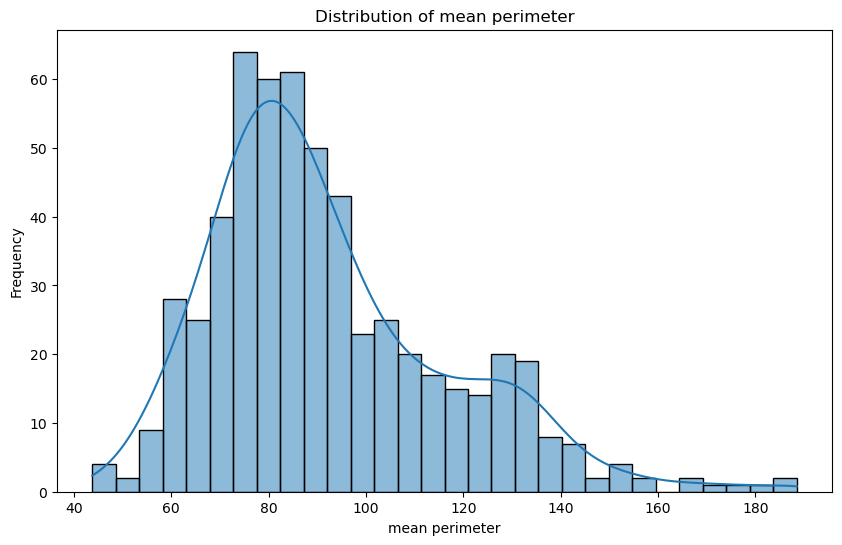

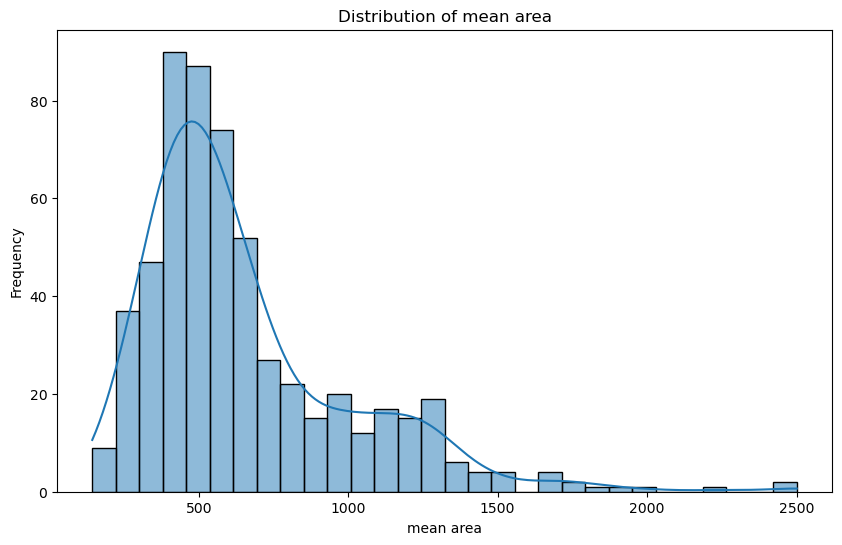

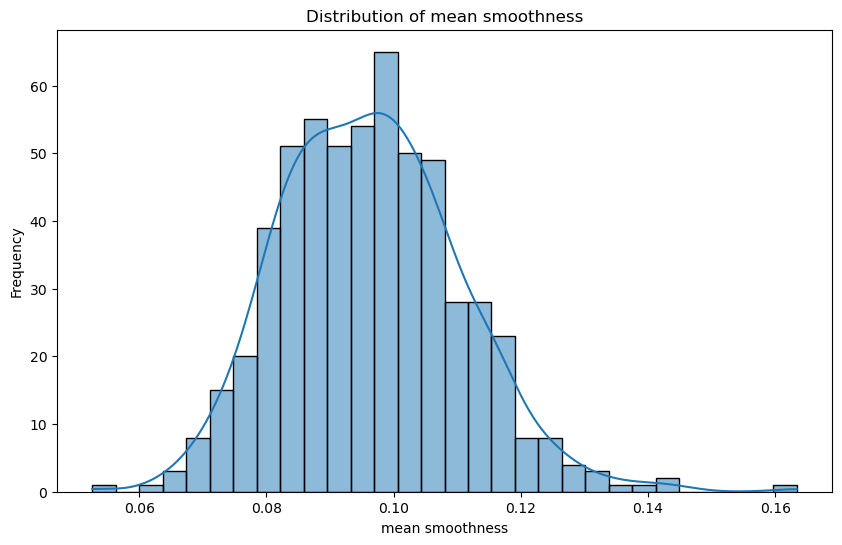

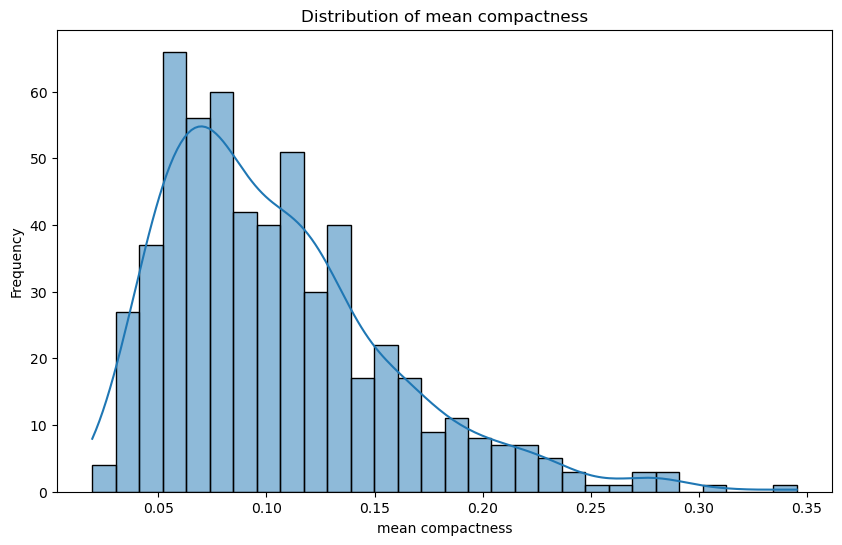

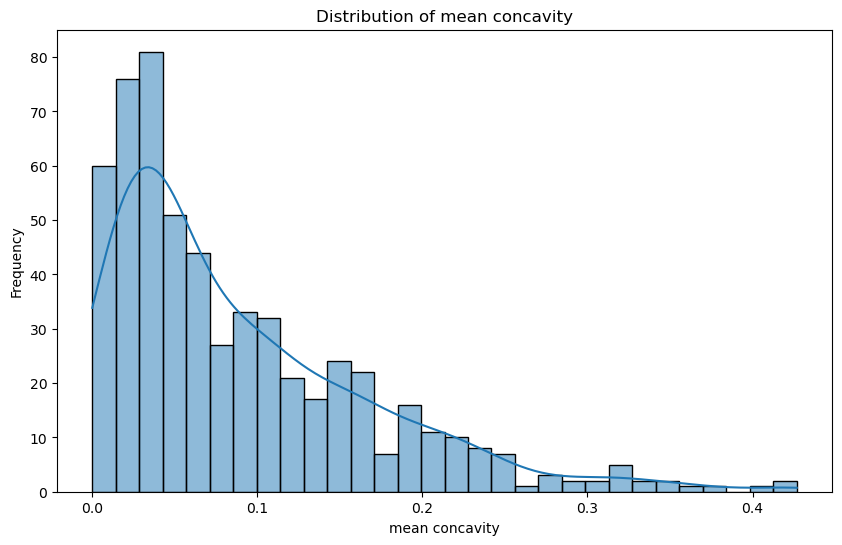

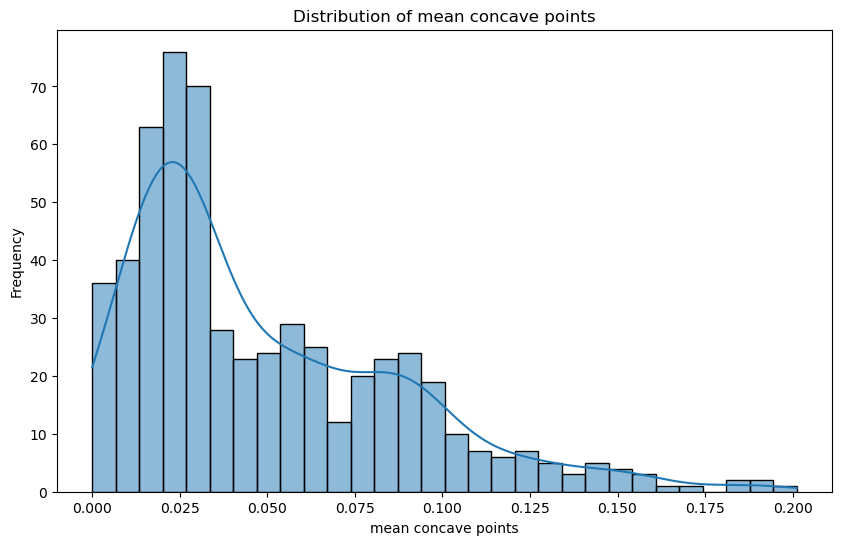

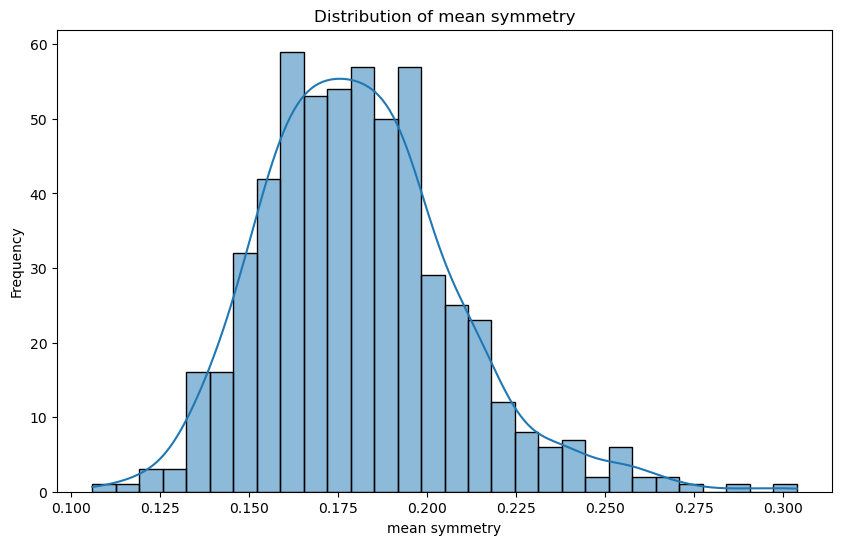

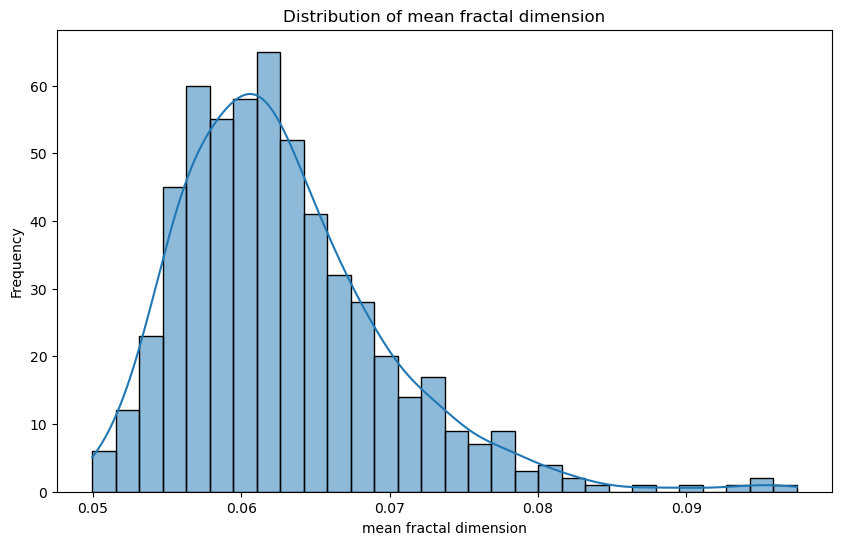

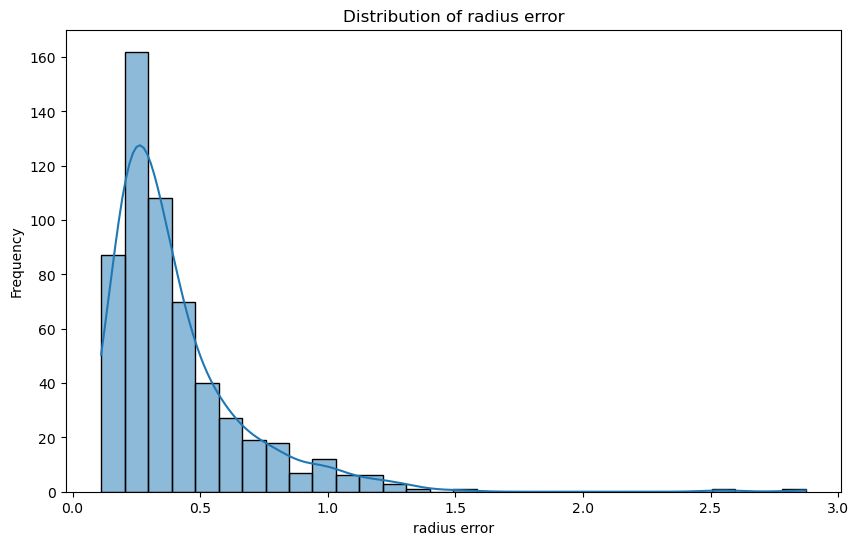

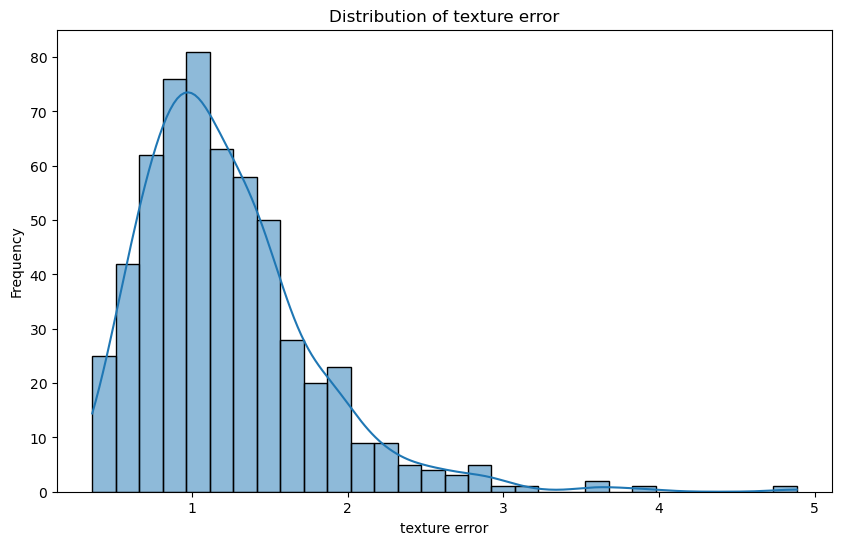

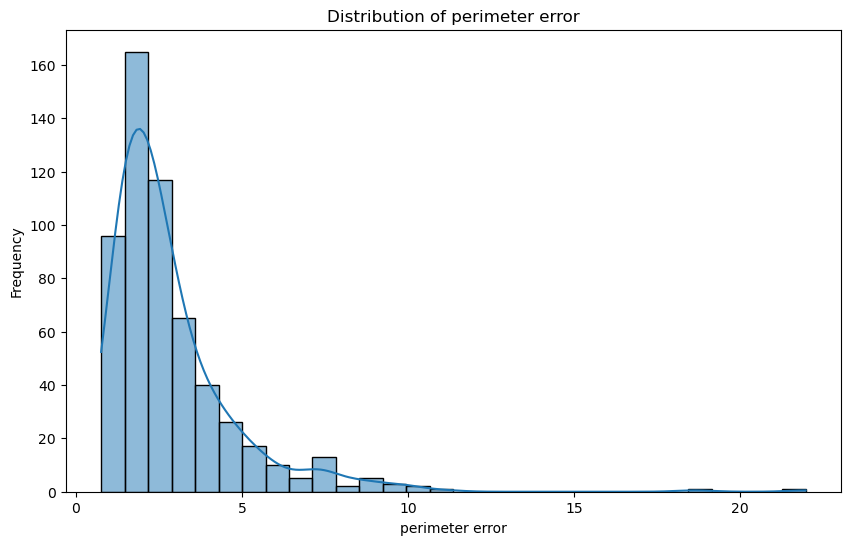

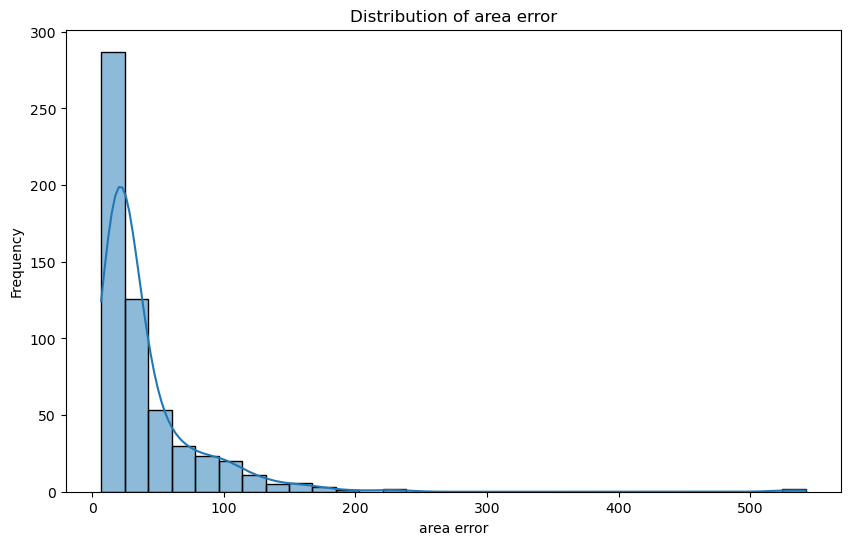

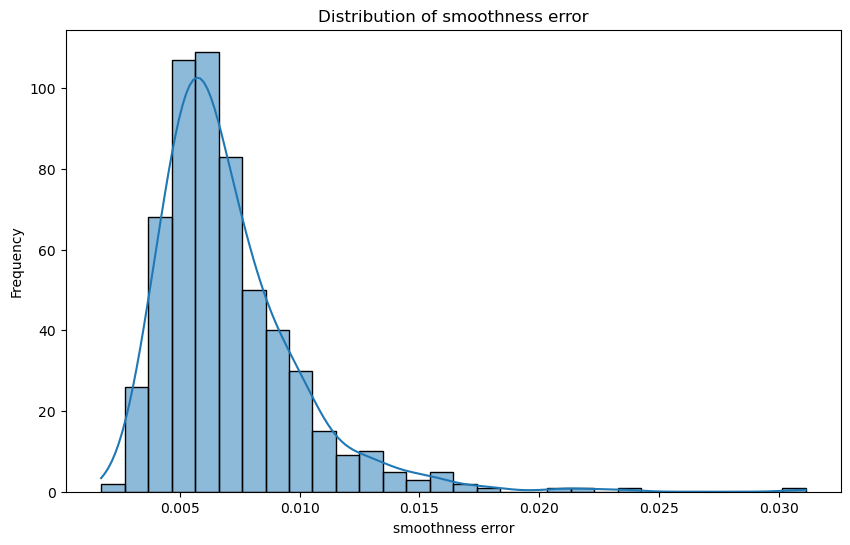

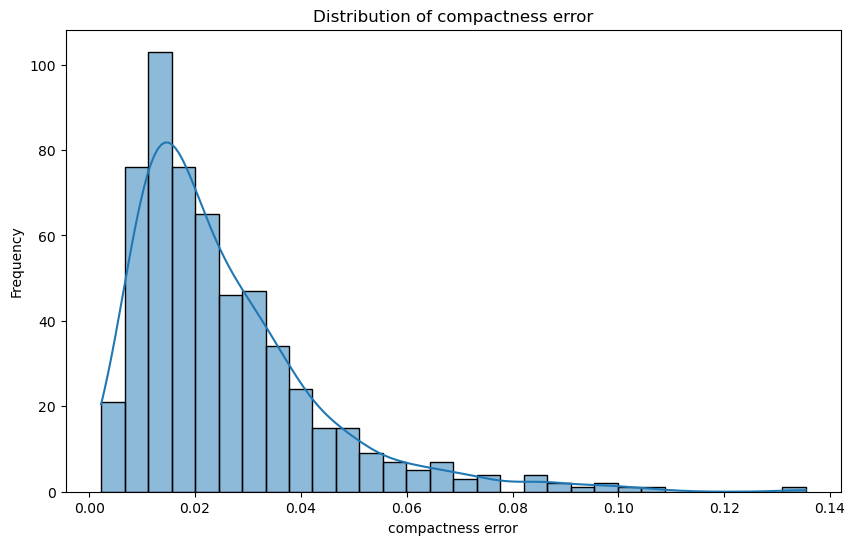

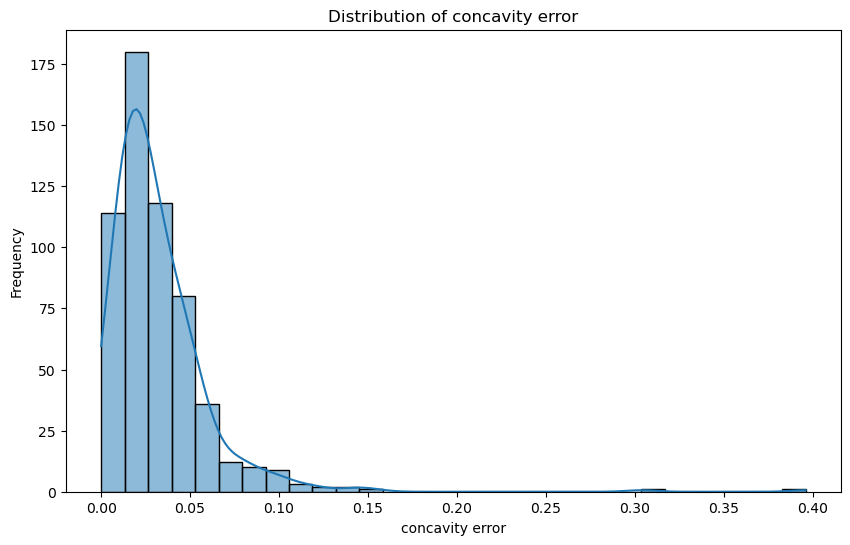

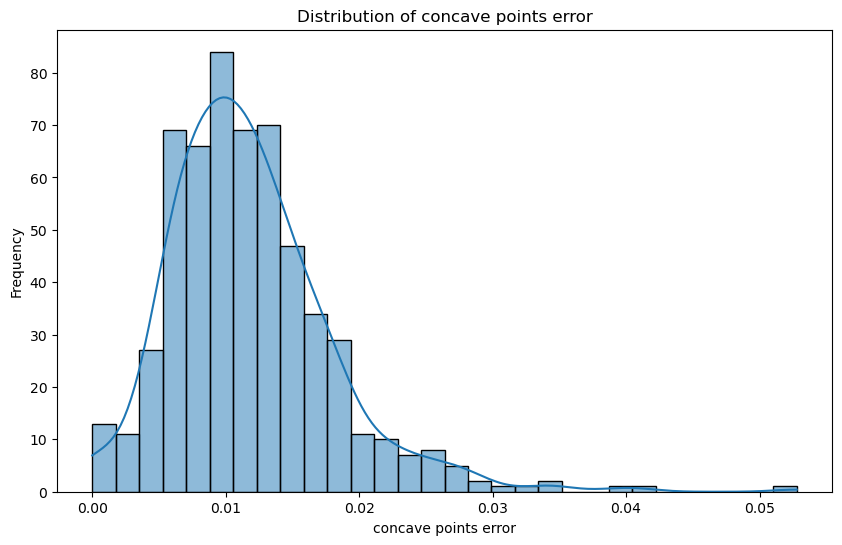

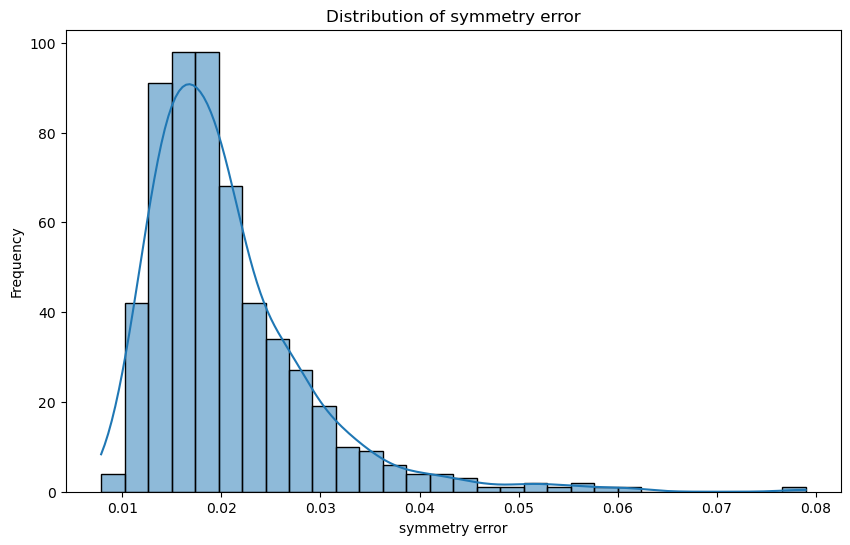

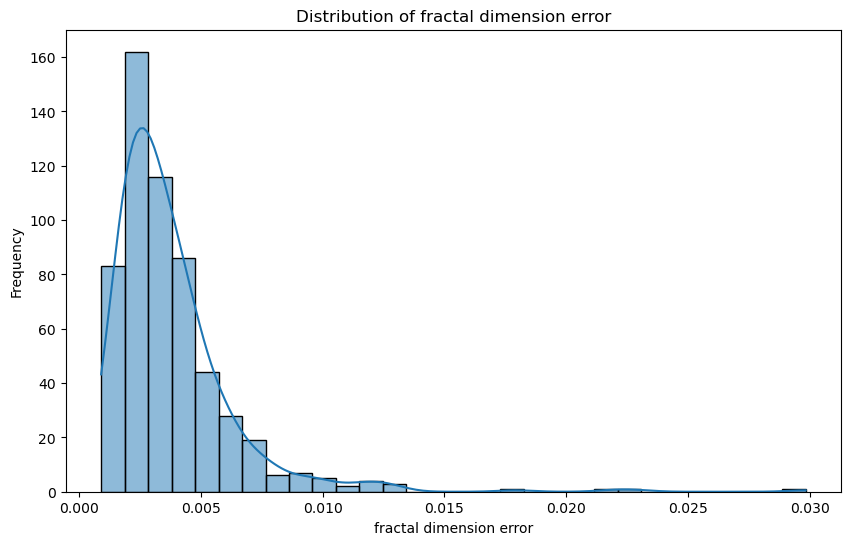

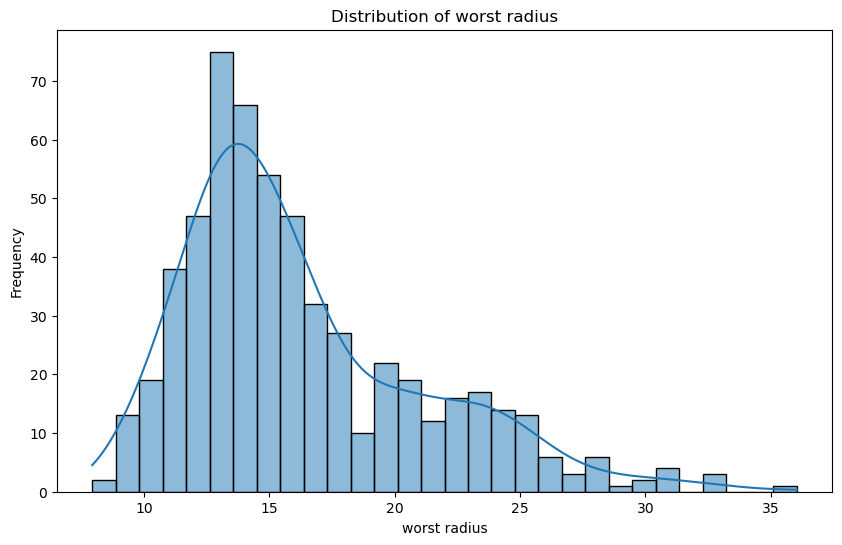

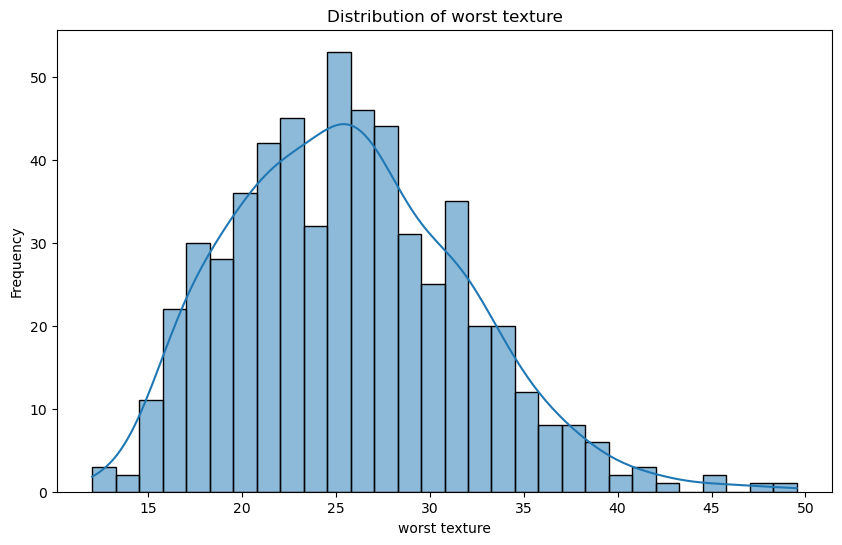

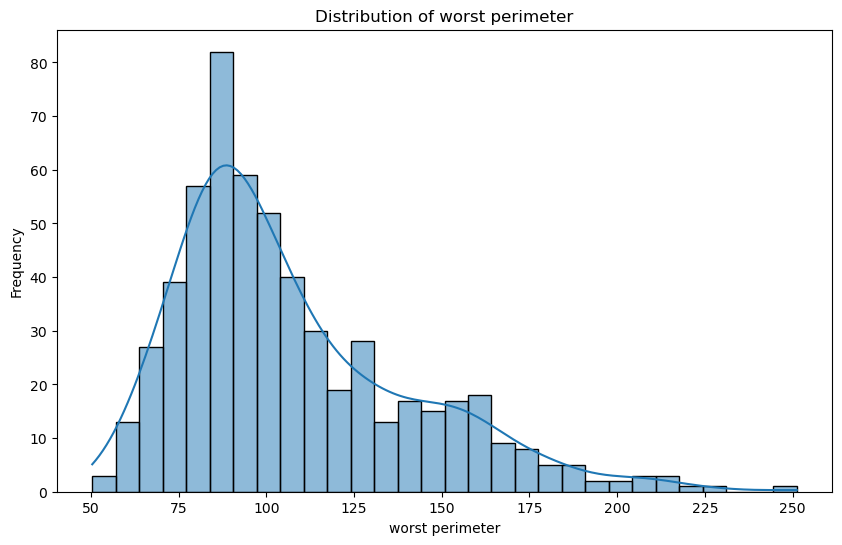

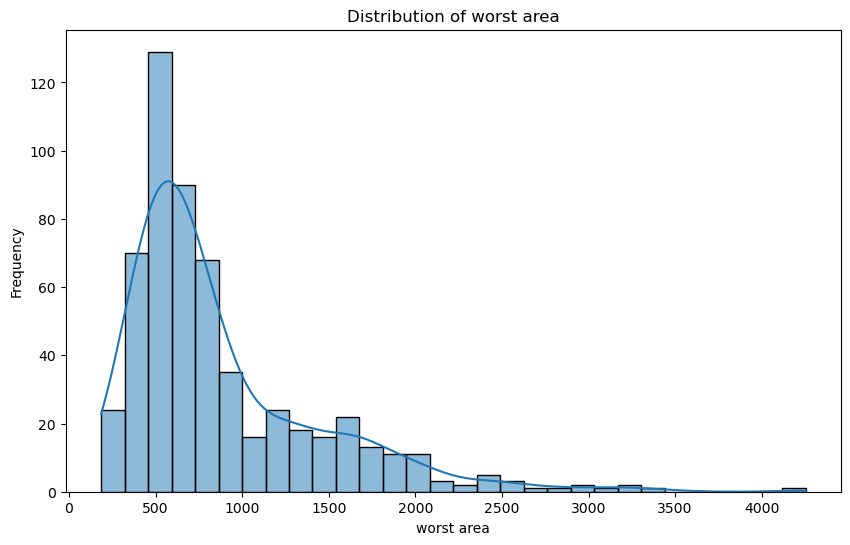

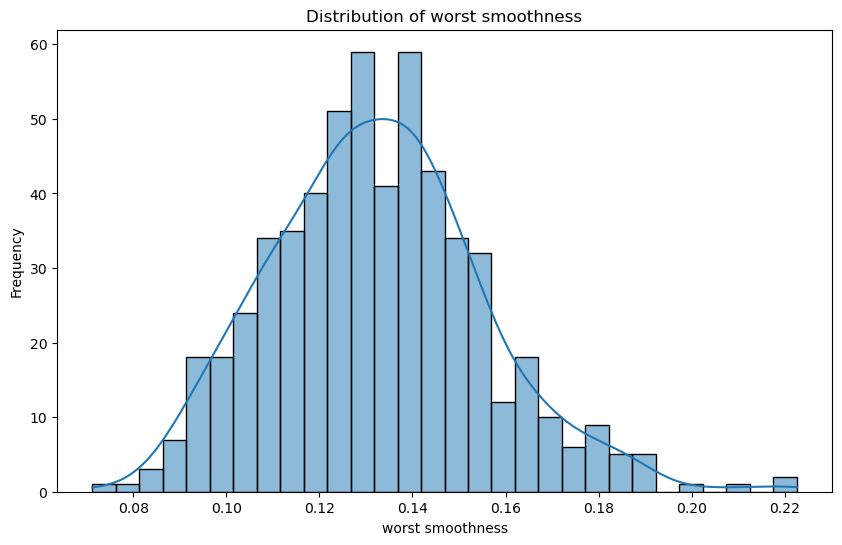

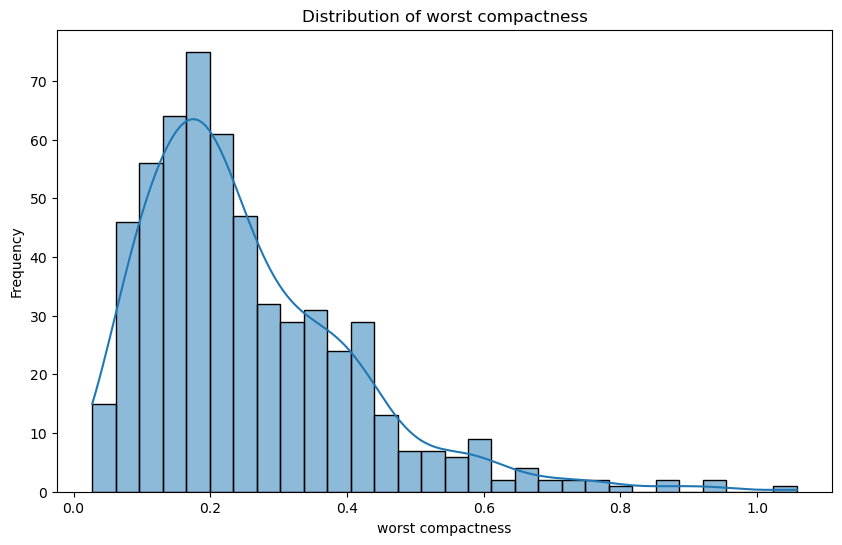

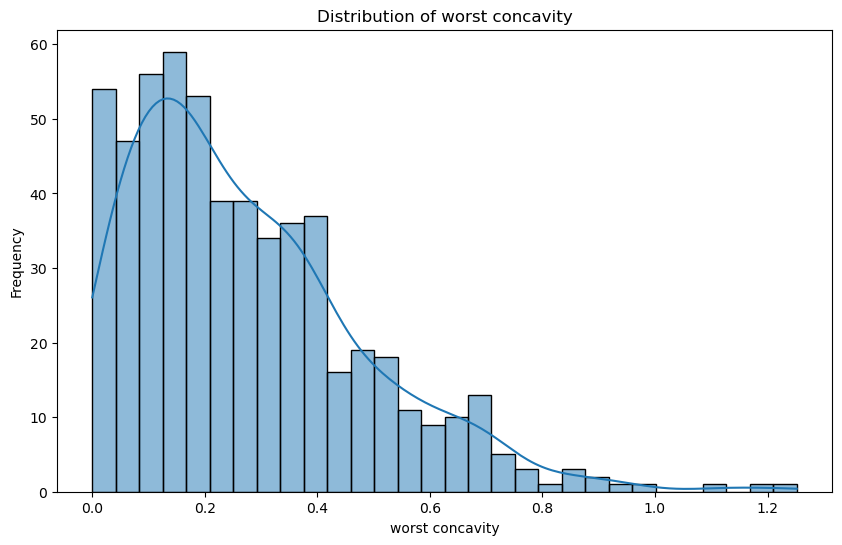

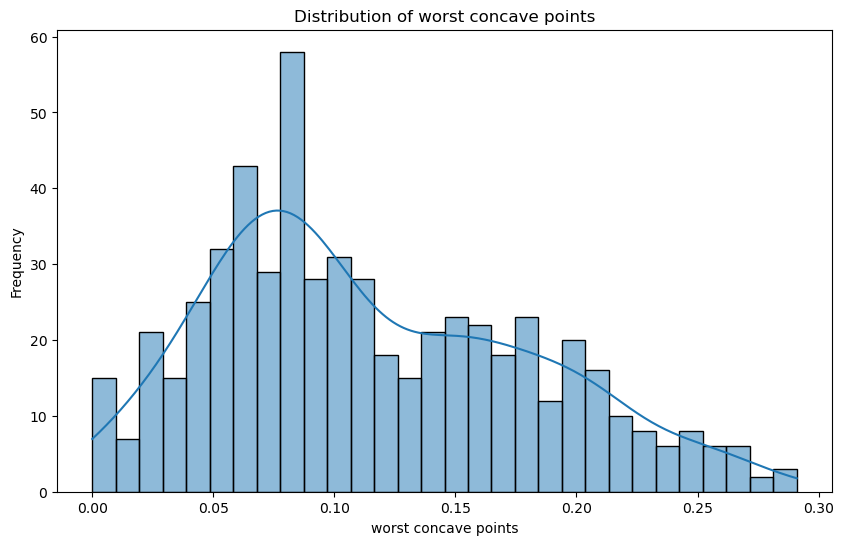

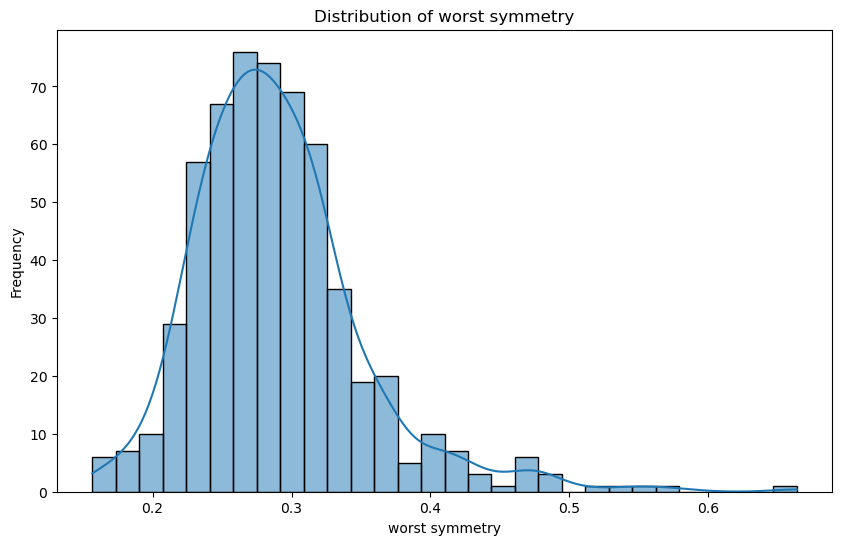

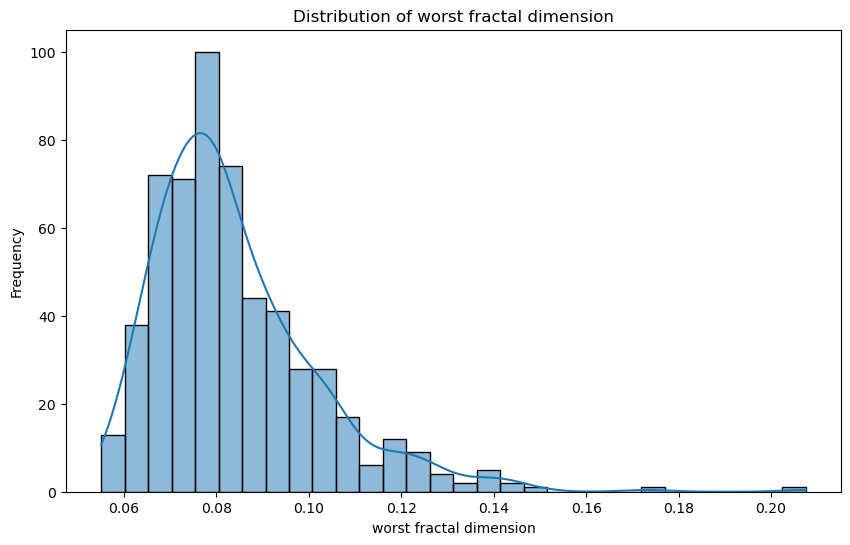

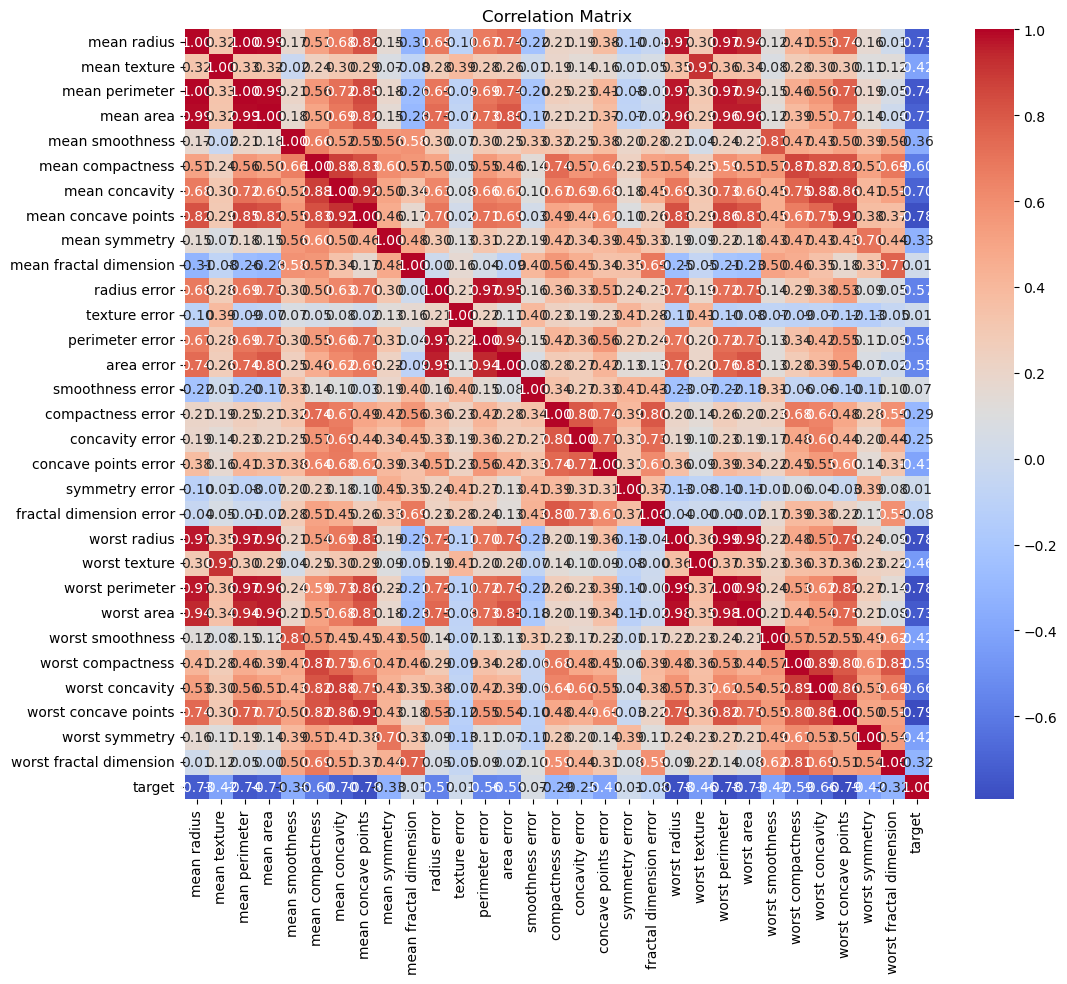

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the dataset
#data = pd.read_csv('breast_cancer_data.csv')  # Replace with the actual path to your dataset

load_data = load_breast_cancer()
data = pd.DataFrame(load_data.data, columns=load_data.feature_names)
data['target'] = load_data.target

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Visualize the distribution of key features
features = data.columns[:-1]  # Assuming the last column is the target variable
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 2. Implementing a Decision Tree Classifier from Scratch

Next, we will implement a Decision Tree Classifier using the Gini index for splitting.


In [92]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def gini_index(self, y):
        classes, counts = np.unique(y, return_counts=True)
        total = counts.sum()
        return 1 - sum((count / total) ** 2 for count in counts)

    def best_split(self, X, y):
        best_gini = float('inf')
        best_split = None
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = X[:, feature_index] >= threshold
                
                if len(y[left_indices]) < self.min_samples_split or len(y[right_indices]) < self.min_samples_split:
                    continue
                
                gini_left = self.gini_index(y[left_indices])
                gini_right = self.gini_index(y[right_indices])
                gini = (len(y[left_indices]) * gini_left + len(y[right_indices]) * gini_right) / n_samples
                
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, threshold)
        
        return best_split

    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return np.mean(y)  # Return the mean or majority class
        
        split = self.best_split(X, y)
        if split is None:
            return np.mean(y)  # Return the mean or majority class
        
        feature_index, threshold = split
        left_indices = X[:, feature_index] < threshold
        right_indices = X[:, feature_index] >= threshold
        
        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return (feature_index, threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, sample, tree):
        if not isinstance(tree, tuple):
            return tree  # Return the prediction
        
        feature_index, threshold, left_subtree, right_subtree = tree
        if sample[feature_index] < threshold:
            return self.predict_sample(sample, left_subtree)
        else:
            return self.predict_sample(sample, right_subtree)

    def predict(self, X):
        return np.array([self.predict_sample(sample, self.tree) for sample in X])


### 3. Recursive Process for Splitting the Dataset

The recursive process for splitting the dataset based on the Gini index involves the following steps:

- **Base Case**: If the number of samples is less than `min_samples_split` or if the maximum depth of the tree is reached, return the mean or majority class of the target variable.
- **Finding the Best Split**: For each feature, calculate the Gini index for all possible thresholds. Choose the split that results in the lowest Gini index.
- **Splitting the Data**: Use the best split to divide the dataset into left and right subsets.
- **Recursion**: Recursively apply the same process to the left and right subsets until the base case is met.

### 4. Evaluating the Performance of the Classifier

To evaluate the performance, we can use metrics such as accuracy, precision, recall, and the confusion matrix. We will also visualize the confusion matrix.


Accuracy: 0.9385964912280702
Precision: 0.9571428571428572
Recall: 0.9436619718309859


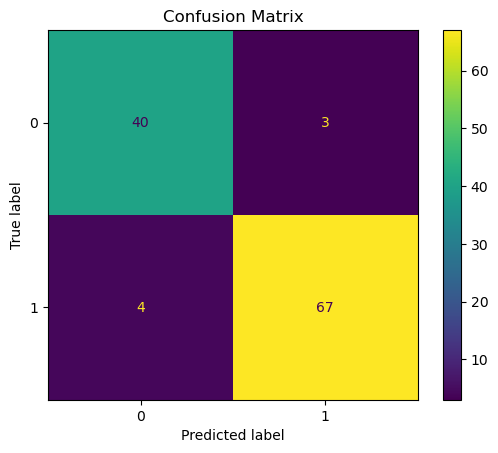

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

# Assuming 'target' is the name of the target column
X = data.drop('target', axis=1).values
y = data['target'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTree(max_depth=5)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# If y_pred contains continuous values (probabilities), convert to binary class labels
y_pred = (y_pred > 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()



### 5. Visualizing the Confusion Matrix and ROC Curve

To visualize the ROC curve, we can use the `roc_curve` and `auc` functions from `sklearn.metrics`.


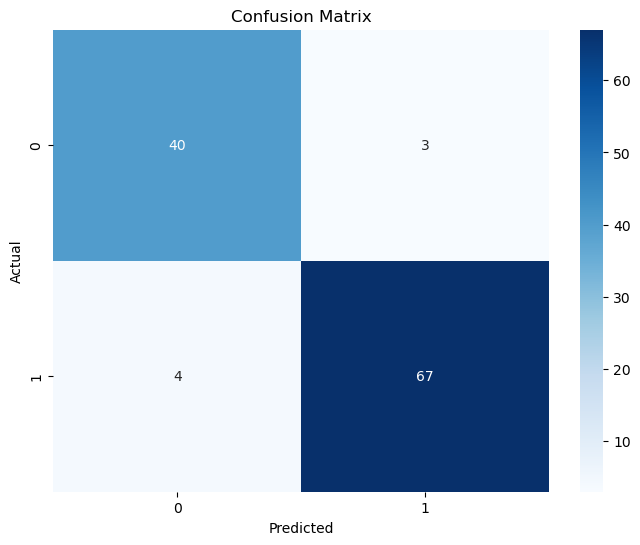

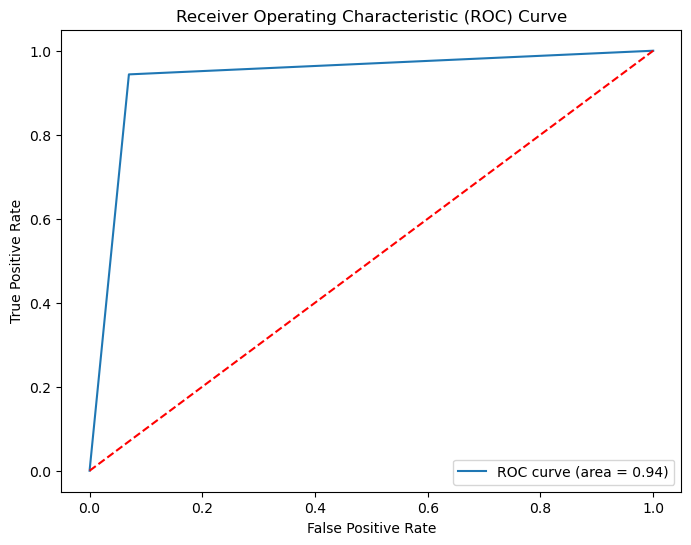

In [96]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
